In [9]:
library(RPostgreSQL)
library(VennDiagram)
library(GenomicRanges)


Loading required package: grid
Loading required package: futile.logger


In [2]:
source("~/git-repos/BDDS/footprints/testdb/src/dbFunctions.R")

In [3]:
if(!exists("db.cory"))
    db.cory <- getDBConnection("testcory_whovian")

In [16]:
allcory.tbl.regions <- dbGetQuery(db.cory, "select * from regions")

In [17]:
t(head(allcory.tbl.regions))

,1,2,3,4,5,6
loc,chr1:1374909-1374919,chr1:1780137-1780147,chr1:2673795-2673805,chr1:2680018-2680028,chr1:2755701-2755711,chr1:2760113-2760123
chrom,chr1,chr1,chr1,chr1,chr1,chr1
start,1374909,1780137,2673795,2680018,2755701,2760113
endpos,1374919,1780147,2673805,2680028,2755711,2760123


In [19]:
dim(allcory.tbl.regions)

[1] 2784914       4

In [20]:
length(allcory.tbl)

[1] 5744887      14

In [4]:
allcory.tbl <- dbGetQuery(db.cory, "select * from hits")

In [5]:
t(head(allcory.tbl))

,1,2,3,4,5,6
loc,chr1:84988804-84988814,chr1:85201065-85201075,chr1:85201754-85201764,chr1:85276405-85276415,chr1:86396334-86396344,chr1:86914545-86914555
type,motif.in.footprint,motif.in.footprint,motif.in.footprint,motif.in.footprint,motif.in.footprint,motif.in.footprint
name,MA0746.1,MA0746.1,MA0746.1,MA0746.1,MA0746.1,MA0746.1
length,11,11,11,11,11,11
strand,+,+,-,+,+,-
sample_id,ENCSR000EJGhint20,ENCSR000EJGhint20,ENCSR000EJGhint20,ENCSR000EJGhint20,ENCSR000EJGhint20,ENCSR000EJGhint20
method,HINT,HINT,HINT,HINT,HINT,HINT
provenance,testcory.filler.minid,testcory.filler.minid,testcory.filler.minid,testcory.filler.minid,testcory.filler.minid,testcory.filler.minid
score1,32,34,20,8,41,82
score2,12.2276,11.2033,11.8293,10.7317,13.0000,14.3740


In [6]:
unique(allcory.tbl$sample_id)

[1] "ENCSR000EJGhint20" "ENCSR000EMThint16" "ENCSR000EMThint20"
[4] "ENCSR000EJGhint16" "ENCSR000EJGhint18"

In [7]:
EJ.16.locs <- allcory.tbl[allcory.tbl$sample_id == 'ENCSR000EJGhint16',"loc"]
EJ.18.locs <- allcory.tbl[allcory.tbl$sample_id == 'ENCSR000EJGhint18',"loc"]
EJ.20.locs <- allcory.tbl[allcory.tbl$sample_id == 'ENCSR000EJGhint20',"loc"]
EM.16.locs <- allcory.tbl[allcory.tbl$sample_id == 'ENCSR000EMThint16',"loc"]
EM.20.locs <- allcory.tbl[allcory.tbl$sample_id == 'ENCSR000EMThint20',"loc"]

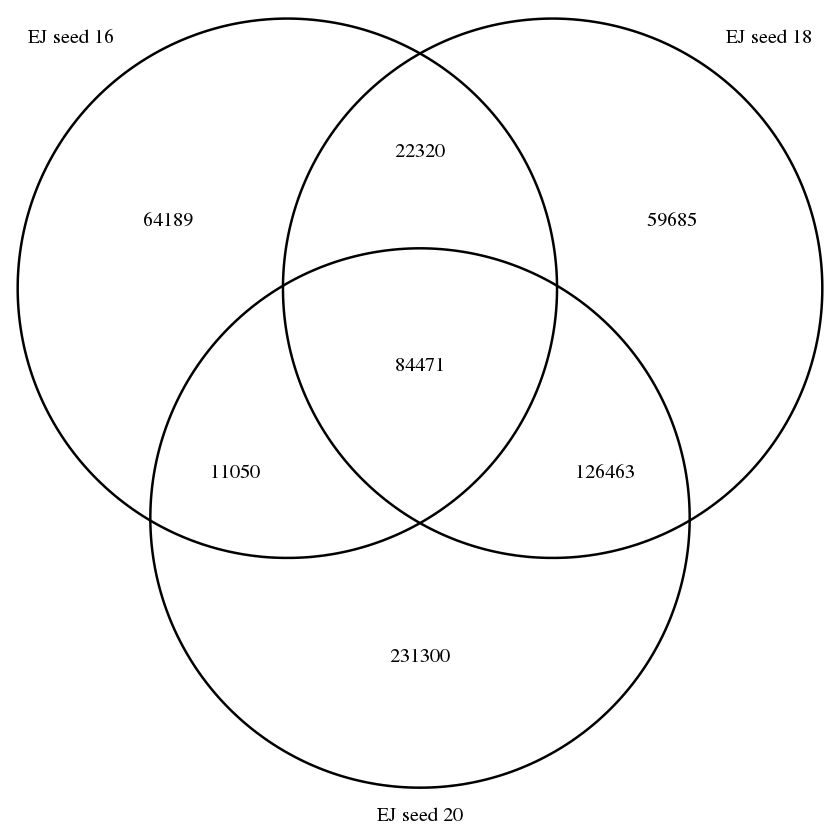

In [10]:
v.in <- list(EJ.16.locs,EJ.18.locs,EJ.20.locs)
names(v.in) <- c("EJ seed 16","EJ seed 18","EJ seed 20")
venn.plot <- venn.diagram(v.in, NULL)
grid.draw(venn.plot)

In [15]:
length(unique(EJ.16.locs))
length(unique(EJ.18.locs))
length(unique(EJ.20.locs))

[1] 182030

[1] 292939

[1] 453284

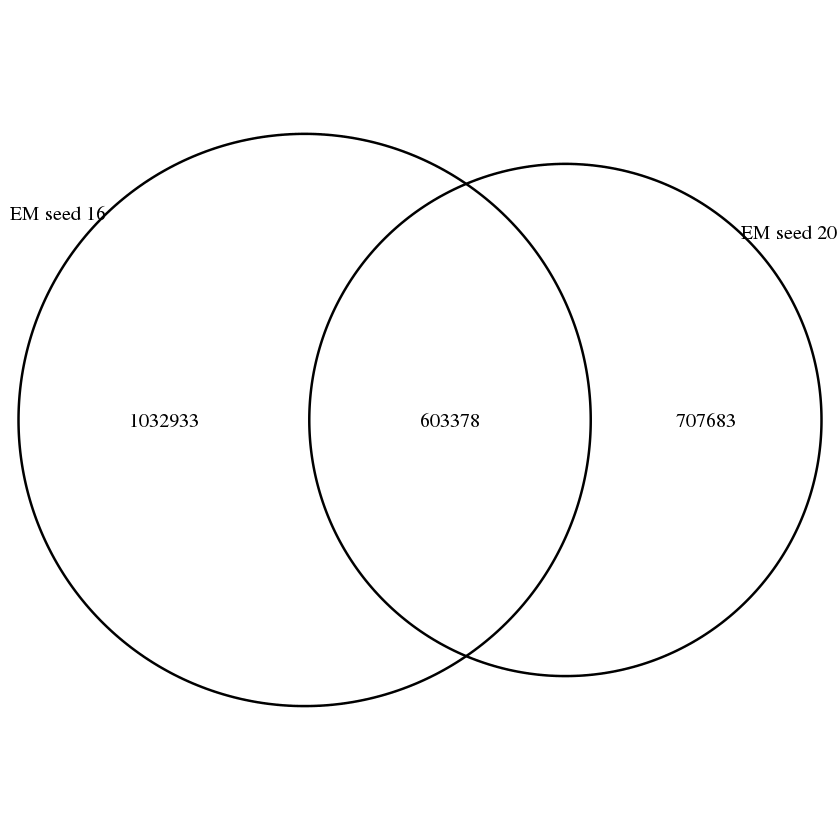

In [11]:
v.in <- list(EM.16.locs, EM.20.locs)
names(v.in) <- c("EM seed 16","EM seed 20")
venn.plot <- venn.diagram(v.in, NULL)
grid.draw(venn.plot)

In [14]:
length(unique(EM.16.locs))
length(unique(EM.20.locs))

[1] 1636311

[1] 1311061

In [21]:
if(!exists("db.chipseq"))
    dbname="chipseq"
    port = "5432"
    driver = dbDriver("PostgreSQL")
    user= "trena"
    password="trena"
    host="whovian"
    db.chipseq <- dbConnect(drv=driver, user=user, password=password, dbname=dbname, host=host, 
            port=port)

In [23]:
chipseq.hits <- dbGetQuery(db.chipseq, "select * from hits")
chipseq.regions <- dbGetQuery(db.chipseq, "select * from regions")

In [25]:
chipseq.locs <- chipseq.regions$loc

In [27]:
head(chipseq.locs)

[1] "chr1:1677841-1677991" "chr1:1678101-1678251" "chr1:1828321-1828471"
[4] "chr1:1828521-1828671" "chr1:1828761-1828911" "chr1:2255801-2255951"

In [28]:
head(EM.16.locs)

[1] "chr1:586125-586135"   "chr1:610118-610128"   "chr1:976189-976199"  
[4] "chr1:979394-979404"   "chr1:1000472-1000482" "chr1:1013556-1013566"

In [ ]:
gr.EM.16 = with(x0, GRanges(chr, IRanges(start=start, end=stop)))

In [ ]:
gr.chipseq = with(x1, GRanges(chr, IRanges(start=start, end=stop)))

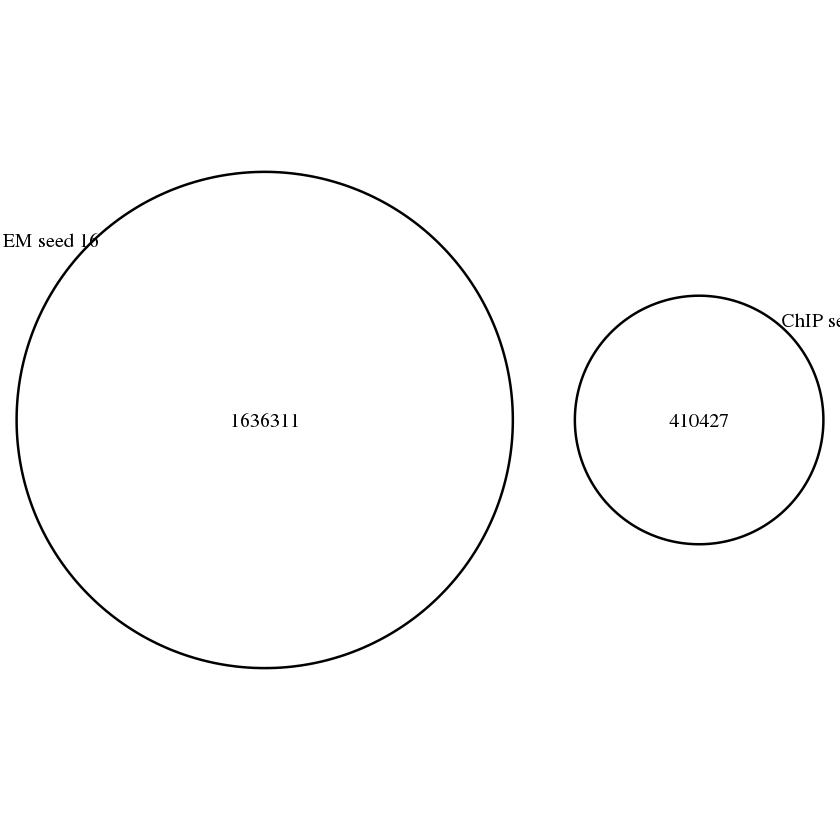

In [26]:
v.in <- list(EM.16.locs, chipseq.locs)
names(v.in) <- c("EM seed 16","ChIP seq")
venn.plot <- venn.diagram(v.in, NULL)
grid.draw(venn.plot)

In [66]:
# function to transform list of strings of the form chr1:84988804-84988814 into regino table compatible dataframes

parse_loc_stings <- function(loc_strings) {
    require("reshape2")
    parsed.data <- colsplit(loc_strings, "[[:punct:]]", names=c("chrom", "start", "endpos"))
    return(cbind(loc=loc_strings,parsed.data,stringsAsFactors=FALSE))
}

In [67]:
EM.16.locs.regions <- parse_loc_stings(EM.16.locs)

In [68]:
EM.20.locs.regions <- parse_loc_stings(EM.20.locs)

In [69]:
str(EM.16.locs.regions)
str(EM.20.locs.regions)
str(chipseq.regions)

'data.frame':	2394614 obs. of  4 variables:
 $ loc   : chr  "chr1:586125-586135" "chr1:610118-610128" "chr1:976189-976199" "chr1:979394-979404" ...
 $ chrom : chr  "chr1" "chr1" "chr1" "chr1" ...
 $ start : int  586125 610118 976189 979394 1000472 1013556 1013563 1172031 1489372 1600409 ...
 $ endpos: int  586135 610128 976199 979404 1000482 1013566 1013573 1172041 1489382 1600419 ...
'data.frame':	1926489 obs. of  4 variables:
 $ loc   : chr  "chr1:267971-267981" "chr1:586125-586135" "chr1:630845-630855" "chr1:631103-631113" ...
 $ chrom : chr  "chr1" "chr1" "chr1" "chr1" ...
 $ start : int  267971 586125 630845 631103 976189 1000472 1005185 1013556 1013563 1172031 ...
 $ endpos: int  267981 586135 630855 631113 976199 1000482 1005195 1013566 1013573 1172041 ...
'data.frame':	410427 obs. of  4 variables:
 $ loc   : chr  "chr1:1677841-1677991" "chr1:1678101-1678251" "chr1:1828321-1828471" "chr1:1828521-1828671" ...
 $ chrom : chr  "chr1" "chr1" "chr1" "chr1" ...
 $ start : int  1677841

In [71]:
EM.16.locs.gr = with(EM.16.locs.regions, GRanges(chrom, IRanges(start=start, end=endpos)))
EM.20.locs.gr = with(EM.20.locs.regions, GRanges(chrom, IRanges(start=start, end=endpos)))
chipseq.regions.gr = with(chipseq.regions, GRanges(chrom, IRanges(start=start, end=endpos)))

In [75]:
EM.16.chipseq.overlaps.gr <- findOverlaps(EM.16.locs.gr, chipseq.regions.gr, type="any")
EM.20.chipseq.overlaps.gr <- findOverlaps(EM.20.locs.gr, chipseq.regions.gr, type="any")

In [88]:
EM.16.chipseq.overlap.regions <- EM.16.locs.regions[as.data.frame(EM.16.chipseq.overlaps.gr)$queryHits,]
EM.20.chipseq.overlap.regions <- EM.20.locs.regions[as.data.frame(EM.20.chipseq.overlaps.gr)$queryHits,]

In [92]:
dim(EM.16.locs.regions)
dim(EM.20.locs.regions)
dim(EM.16.chipseq.overlap.regions)
dim(EM.20.chipseq.overlap.regions)

[1] 2394614       4

[1] 1926489       4

[1] 1267427       4

[1] 1110527       4

In [95]:
1267427/2394614

[1] 0.5292824

In [96]:
1110527/1926489

[1] 0.5764513

In [101]:
EM.16.chipseq.overlap.regions.gr <- with(EM.16.chipseq.overlap.regions, GRanges(chrom, IRanges(start=start, end=endpos)))
EM.20.chipseq.overlap.regions.gr <- with(EM.20.chipseq.overlap.regions, GRanges(chrom, IRanges(start=start, end=endpos)))

In [105]:
EM.16.20.chipseq.overlaps.gr <- findOverlaps(EM.16.chipseq.overlap.regions.gr, EM.20.chipseq.overlap.regions.gr, type="any")
EM.20.16.chipseq.overlaps.gr <- findOverlaps(EM.20.chipseq.overlap.regions.gr, EM.16.chipseq.overlap.regions.gr, type="any")

In [108]:
length(unique(as.data.frame(EM.16.20.chipseq.overlaps.gr)$queryHits))
length(unique(as.data.frame(EM.20.16.chipseq.overlaps.gr)$queryHits))

[1] 676631

[1] 691877

In [109]:
EM.16.20.exact.chipseq.overlaps.gr <- findOverlaps(EM.16.chipseq.overlap.regions.gr, EM.20.chipseq.overlap.regions.gr, type="equal")

In [110]:
length(unique(as.data.frame(EM.16.20.exact.chipseq.overlaps.gr)$queryHits))

[1] 538124